In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore,boxcox
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,roc_auc_score

# Importing the Dataset

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [408]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [409]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no null values in the columns.

In [410]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

The data type of each and every columns.

In [411]:
df.info()   #the non null values count and data type of each columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


# Univariant, Bivariant, Multivariant Analysis

<AxesSubplot:xlabel='W', ylabel='count'>

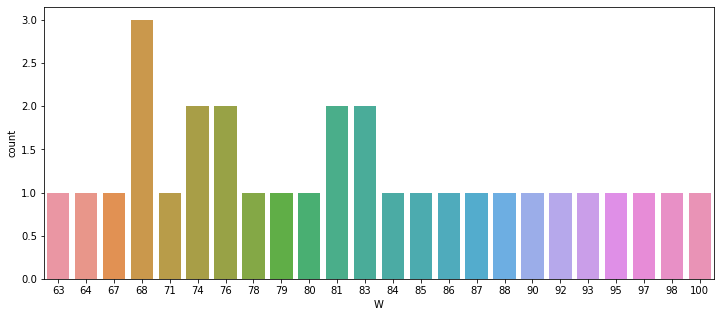

In [412]:
plt.figure(figsize=(12,5))
sns.countplot(df['W'])

The above table represent the unique count of our predicted varaible i.e 'W'

<AxesSubplot:xlabel='R', ylabel='W'>

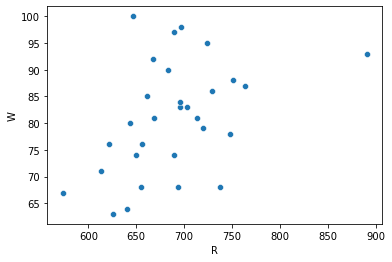

In [413]:
sns.scatterplot(x='R',y='W',data=df)

we can conclude from the above plot that if 'R' runs scored increase 'W' wins also increase.

<AxesSubplot:xlabel='ERA', ylabel='Density'>

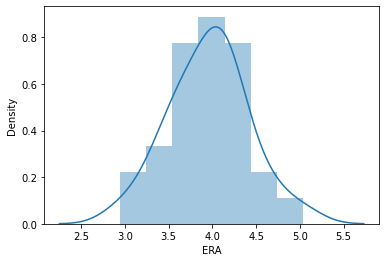

In [5]:
sns.distplot(df['ERA'])

We can say that the data is normally distributed for 'ERA'

<AxesSubplot:xlabel='W', ylabel='Density'>

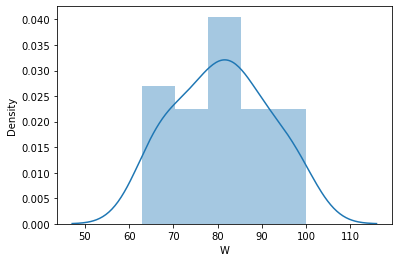

In [7]:
sns.distplot(df['W'])

We can see that the data at 'W' is normally distributed. 

<AxesSubplot:xlabel='R'>

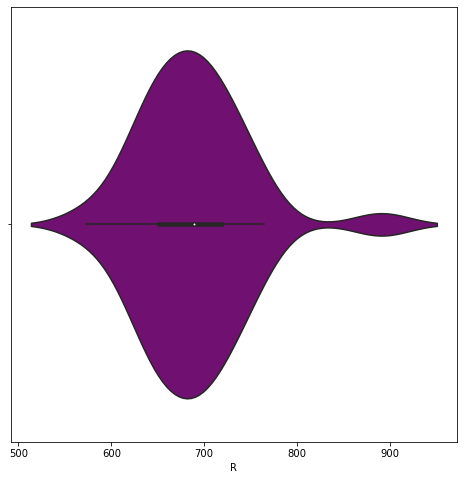

In [414]:
plt.figure(figsize=(8,8))
sns.violinplot(df["R"],color="purple")

From above violinplot we can say that the runs scored lies in the range of 500-900

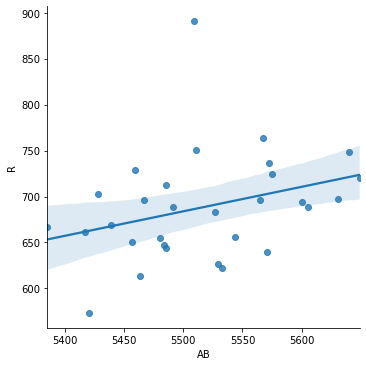

In [415]:
sns.lmplot(x='AB',y='R',data=df)

We can that there is the positive relation between the 'AB' i.e at bat and 'R' runs scored.

<AxesSubplot:xlabel='AB', ylabel='H'>

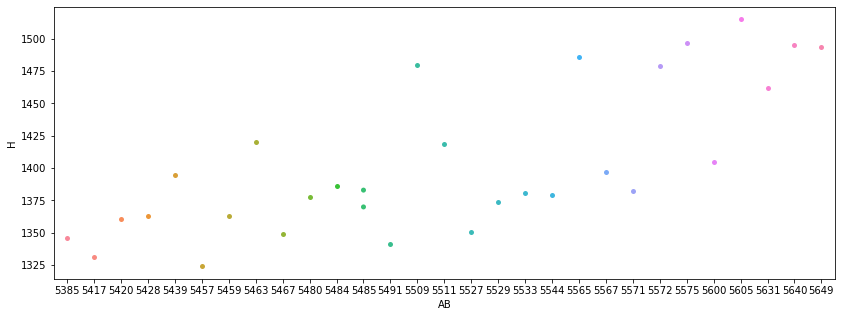

In [416]:
plt.figure(figsize=(14,5))
sns.swarmplot(x='AB',y='H',data=df)

From the above swarmplot we can say that with the incraese in hits 'H' the 'AB' also increases.

<Figure size 720x288 with 0 Axes>

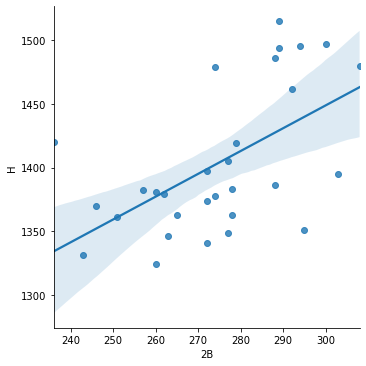

In [417]:
plt.figure(figsize=(10,4))
sns.lmplot(x='2B',y='H',data=df)

We can say that increase in '2B' i.e doubles the number of 'H' hits also increases.

<AxesSubplot:xlabel='HR', ylabel='SO'>

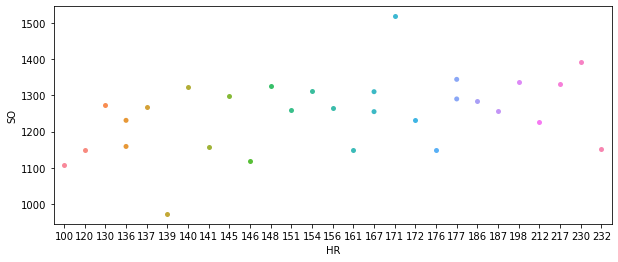

In [418]:
plt.figure(figsize=(10,4))
sns.swarmplot(x='HR',y='SO',data=df)

From above plot we can say that, with the increase in 'SO' strike out the 'HR' home runs value also increases.

<Figure size 720x288 with 0 Axes>

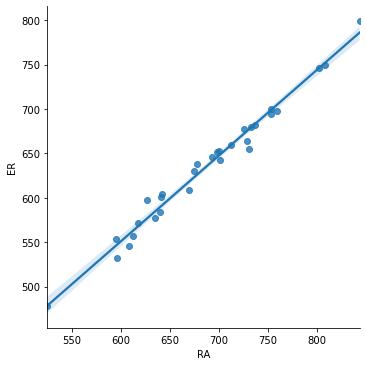

In [419]:
plt.figure(figsize=(10,4))
sns.lmplot(x='RA',y='ER',data=df)

There is very strong linear relationship between ER .e earned runs and RA i.e average run.

<Figure size 720x288 with 0 Axes>

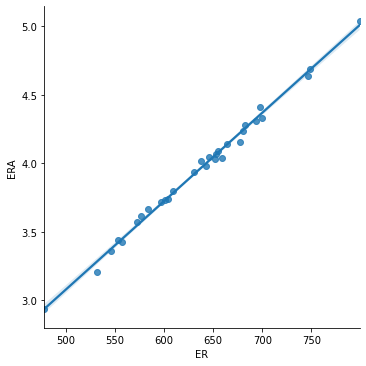

In [420]:
plt.figure(figsize=(10,4))
sns.lmplot(x='ER',y='ERA',data=df)

Frome above it can be seen that there is strong relation bewteen ER: earned runs and ERA :Earned runs average.

W        AxesSubplot(0.125,0.799681;0.0824468x0.0803191)
R      AxesSubplot(0.223936,0.799681;0.0824468x0.0803...
AB     AxesSubplot(0.322872,0.799681;0.0824468x0.0803...
H      AxesSubplot(0.421809,0.799681;0.0824468x0.0803...
2B     AxesSubplot(0.520745,0.799681;0.0824468x0.0803...
3B     AxesSubplot(0.619681,0.799681;0.0824468x0.0803...
HR     AxesSubplot(0.718617,0.799681;0.0824468x0.0803...
BB     AxesSubplot(0.817553,0.799681;0.0824468x0.0803...
SO       AxesSubplot(0.125,0.703298;0.0824468x0.0803191)
SB     AxesSubplot(0.223936,0.703298;0.0824468x0.0803...
RA     AxesSubplot(0.322872,0.703298;0.0824468x0.0803...
ER     AxesSubplot(0.421809,0.703298;0.0824468x0.0803...
ERA    AxesSubplot(0.520745,0.703298;0.0824468x0.0803...
CG     AxesSubplot(0.619681,0.703298;0.0824468x0.0803...
SHO    AxesSubplot(0.718617,0.703298;0.0824468x0.0803...
SV     AxesSubplot(0.817553,0.703298;0.0824468x0.0803...
E        AxesSubplot(0.125,0.606915;0.0824468x0.0803191)
dtype: object

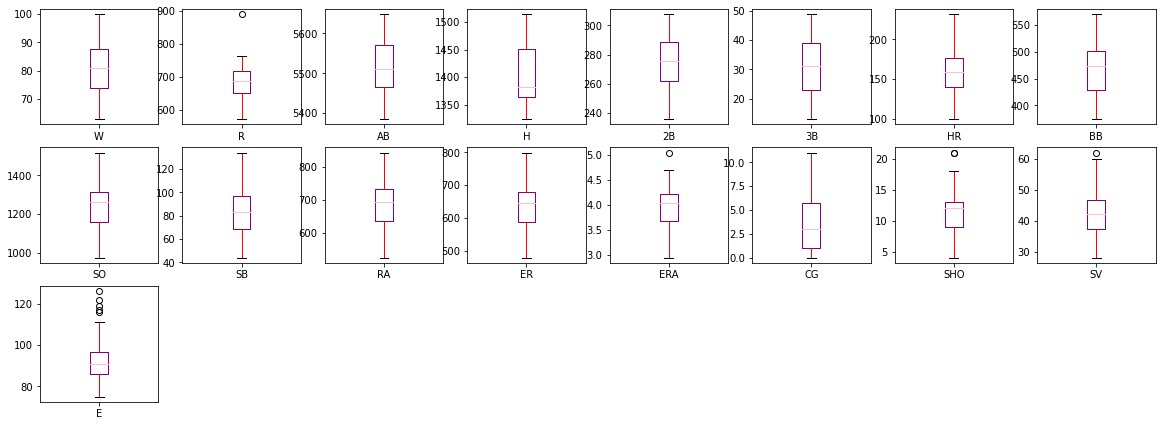

In [421]:
color=dict(boxes="Purple",whiskers="Red",medians="Pink",caps="Black")
df.plot(kind="box",subplots=True,layout=(8,8),figsize=(20,20),color=color)

The above representation of boxplot shows that there are very slight presence of outliers in the data which is in cloumn 'E'

<AxesSubplot:>

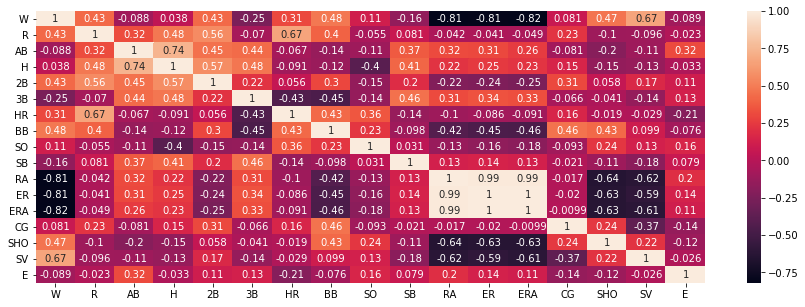

In [422]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)

# Data Cleaning/preprocessing

In [423]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# Skewness and Outliers

In [424]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

From above we can see that there is present of skewness in the above data.

In [425]:
z=np.abs(zscore(df))    #removing outliers
threshold=3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]
df_new

(array([5], dtype=int64), array([1], dtype=int64))


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


We will remove the presence of outliers in the dataset through zscore.

In [426]:
df_new.shape

(29, 17)

The number of rows have been reduced to 29.

In [427]:
df.shape

(30, 17)

In [428]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

After removing outliers we can see that skewness has been reduced to much extent but still there is the presence of skewness in some of the columns for which we will perform yeo-johnson method.

In [429]:
df_new['W'].value_counts()

68     3
74     2
76     2
81     2
83     2
64     1
84     1
100    1
92     1
90     1
88     1
87     1
86     1
85     1
80     1
97     1
79     1
78     1
63     1
71     1
67     1
98     1
95     1
Name: W, dtype: int64

Calculating the unique counts for each type in 'W'.

# Dividing the Dataset into Independent(X) and Dependent Variable(Y)

In [430]:
x=df_new.iloc[:,1:]   #independent variables.
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [431]:
y=df_new.iloc[:,0]  #dependent variables.
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [432]:
y=y.apply(lambda x:1 if  x>84 else 0)   #coverting region into 2 categories.
y                                       #values above 84 in 'w' will be given 1 and below 84 will be given 0

0     1
1     0
2     0
3     0
4     0
6     1
7     0
8     0
9     0
10    1
11    1
12    1
13    0
14    0
15    1
16    1
17    1
18    0
19    0
20    1
21    0
22    0
23    0
24    0
25    1
26    0
27    0
28    0
29    0
Name: W, dtype: int64

In [433]:
y.value_counts()  #value counts of each category

0    19
1    10
Name: W, dtype: int64

# VIF Factor

In [434]:
def cal_vif(x):                #calculating the variance infaltion factor to check the multicolinearities.
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    return(vif)

In [435]:
cal_vif(x)

,variables,VIF FACTOR
0,R,1684.071804
1,AB,4386.435411
2,H,4542.383497
3,2B,874.293076
4,3B,35.695117
5,HR,267.423009
6,BB,260.583556
7,SO,399.764153
8,SB,28.928494
9,RA,17975.314054


From above we can see there is presence of huge multicolinearities in RA,RE,ERA and R,AB,H.

# Feature Engineering

In [436]:
df_new.drop(['ER'],axis=1,inplace=True)  #droping the ER with max vif factor.

In [437]:
df_new.drop(['AB'],axis=1,inplace=True)  #droping ab with max vif factor

In [438]:
df_new.drop(['RA'],axis=1,inplace=True)   #droping ra with max vif factor.

In [439]:
x=df_new.iloc[:,1:]
x

,R,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,724,1497,300,42,139,383,973,104,3.73,2,8,56,88
1,696,1349,277,44,156,439,1264,70,4.07,2,12,45,86
2,669,1395,303,29,141,533,1157,86,3.67,11,10,38,79
3,622,1381,260,27,136,404,1231,68,3.98,7,9,37,101
4,689,1515,289,49,151,455,1259,83,4.64,7,12,35,86
6,764,1397,272,19,212,554,1227,63,4.03,3,4,48,93
7,713,1370,246,20,217,418,1331,44,4.05,0,10,43,77
8,644,1383,278,32,167,436,1310,87,3.74,1,12,60,95
9,748,1495,294,33,161,478,1148,71,4.31,3,10,40,97
10,751,1419,279,32,172,503,1233,101,4.24,5,9,45,119


In [440]:
cal_vif(x)

,variables,VIF FACTOR
0,R,1434.768717
1,H,1907.120050
2,2B,799.736000
3,3B,32.840811
4,HR,182.847916
5,BB,215.410615
6,SO,274.848539
7,SB,25.854205
8,ERA,323.137530
9,CG,5.367030


# Removing Skewness and Standard Scaling

In [441]:
from sklearn.preprocessing import power_transform,StandardScaler
x=power_transform(x,method='yeo-johnson')
x   #Removing the skewness using yeo-johnson.


array([[ 9.62543504e-01,  0.00000000e+00,  1.68518793e+00,
         1.00615029e+00, -7.41927000e-01, -1.60519802e+00,
        -2.55061247e+00,  9.36131648e-01, -5.09292146e-01,
        -3.07098204e-01, -7.87002186e-01,  1.53275292e+00,
        -3.48265262e-01],
       [ 2.98863300e-01,  0.00000000e+00,  1.38197902e-01,
         1.18522654e+00, -1.09958425e-01, -4.62095966e-01,
         9.36832915e-02, -5.16377335e-01,  2.41440214e-01,
        -3.07098204e-01,  2.36736538e-01,  3.12020186e-01,
        -5.40819806e-01],
       [-3.12105130e-01,  0.00000000e+00,  1.90738550e+00,
        -2.28819392e-01, -6.64354121e-01,  1.23209786e+00,
        -9.35611465e-01,  2.25038365e-01, -6.42097599e-01,
         2.01131531e+00, -2.52844176e-01, -6.64136739e-01,
        -1.32612477e+00],
       [-1.30829774e+00,  0.00000000e+00, -8.37664770e-01,
        -4.32227907e-01, -8.60039342e-01, -1.16272085e+00,
        -2.30682707e-01, -6.18421529e-01,  4.30132461e-02,
         1.26446344e+00, -5.13554932e

In [442]:
mn=StandardScaler()
x=mn.fit_transform(x) #perfroming standard scaling bringing all the columns on the same scale.
x

array([[ 9.62543504e-01,  0.00000000e+00,  1.68518793e+00,
         1.00615029e+00, -7.41927000e-01, -1.60519802e+00,
        -2.55061247e+00,  9.36131648e-01, -5.09292146e-01,
        -3.07098204e-01, -7.87002186e-01,  1.53275292e+00,
        -3.48265262e-01],
       [ 2.98863300e-01,  0.00000000e+00,  1.38197902e-01,
         1.18522654e+00, -1.09958425e-01, -4.62095966e-01,
         9.36832915e-02, -5.16377335e-01,  2.41440214e-01,
        -3.07098204e-01,  2.36736538e-01,  3.12020186e-01,
        -5.40819806e-01],
       [-3.12105130e-01,  0.00000000e+00,  1.90738550e+00,
        -2.28819392e-01, -6.64354121e-01,  1.23209786e+00,
        -9.35611465e-01,  2.25038365e-01, -6.42097599e-01,
         2.01131531e+00, -2.52844176e-01, -6.64136739e-01,
        -1.32612477e+00],
       [-1.30829774e+00,  0.00000000e+00, -8.37664770e-01,
        -4.32227907e-01, -8.60039342e-01, -1.16272085e+00,
        -2.30682707e-01, -6.18421529e-01,  4.30132461e-02,
         1.26446344e+00, -5.13554932e

# Performing SMOTE

In [443]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()      #SMOTE to balance the target variable.
x_res,y_res=smt.fit_resample(x,y)

In [444]:
y_res.value_counts()

0    19
1    19
Name: W, dtype: int64

# Performing Algorithms

In [445]:
maxacc=0  #finding the best random state
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=.30,random_state=i)
    lm=LogisticRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxacc:
        maxacc=accu
        maxrs=i
print("best accuracy is",round(maxacc,2),"at random state",maxrs)

best accuracy is 1.0 at random state 1


In [446]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_res,y_res,test_size=.30,random_state=1)

# Logistic Algorithm

In [447]:
lm=LogisticRegression()
lm.fit(x_train1,y_train1)
pred=lm.predict(x_test1)
az=accuracy_score(y_test1,pred)
print("accuracy score",az)
cl=classification_report(y_test1,pred)
print(cl)


accuracy score 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



# Naive Bayes Classifier

In [448]:
knb=KNeighborsClassifier()
knb.fit(x_train1,y_train1)
pred=knb.predict(x_test1)
az=accuracy_score(y_test1,pred)
print("accuracy score",az)
cl=classification_report(y_test1,pred)
print(cl)


accuracy score 0.6666666666666666
              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.60      0.60      0.60         5

    accuracy                           0.67        12
   macro avg       0.66      0.66      0.66        12
weighted avg       0.67      0.67      0.67        12



# Decision Tree Classifier

In [449]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train1,y_train1)
pred=dtc.predict(x_test1)
az=accuracy_score(y_test1,pred)
print("accuracy score",az)
cl=classification_report(y_test1,pred)
print(cl)

accuracy score 0.8333333333333334
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.71      1.00      0.83         5

    accuracy                           0.83        12
   macro avg       0.86      0.86      0.83        12
weighted avg       0.88      0.83      0.83        12



# Random Forest Classifier

In [450]:
rf=RandomForestClassifier()
rf.fit(x_train1,y_train1)
pred=rf.predict(x_test1)
print(accuracy_score(y_test1,pred))
print(classification_report(y_test1,pred))

0.8333333333333334
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.71      1.00      0.83         5

    accuracy                           0.83        12
   macro avg       0.86      0.86      0.83        12
weighted avg       0.88      0.83      0.83        12



# Ada Boost Classifier

In [451]:
ad=AdaBoostClassifier()
ad.fit(x_train1,y_train1)
pred=ad.predict(x_test1)
az=accuracy_score(y_test1,pred)
print("accuracy score",az)
cl=classification_report(y_test1,pred)
print(cl)

accuracy score 0.9166666666666666
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.83      1.00      0.91         5

    accuracy                           0.92        12
   macro avg       0.92      0.93      0.92        12
weighted avg       0.93      0.92      0.92        12



# Support Vector Classifier

In [452]:
svc1=SVC(kernel="poly",probability=True)
svc1.fit(x_train1,y_train1)
pred=svc1.predict(x_test1)
print("Accuracy score",accuracy_score(y_test1,pred))
print(classification_report(y_test1,pred))

Accuracy score 0.9166666666666666
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.80      0.89         5

    accuracy                           0.92        12
   macro avg       0.94      0.90      0.91        12
weighted avg       0.93      0.92      0.91        12



# Cross Validation Score

In [453]:
print(cross_val_score(dtc,x,y,cv=5).mean())  #decision Tree classifier

0.7933333333333333


In [454]:
print(cross_val_score(lm,x,y,cv=5).mean())   #logistic regression

0.6866666666666668


In [455]:
print(cross_val_score(rf,x,y,cv=5).mean())   #random forest classifier

0.8333333333333334


In [456]:
print(cross_val_score(ad,x,y,cv=5).mean())    #ada boost classifier

0.8333333333333334


In [457]:
print(cross_val_score(svc1,x,y,cv=5).mean())   #support vector calssifier

0.6533333333333333


In [458]:
print(cross_val_score(knb,x,y,cv=5).mean())    #kneighbors calssifier

0.62


From the above cross validation results and accuracy results we can see that the difference between cv scores and accuracy score is 0 for random Forest Classifier which shows no over fitting and underfitting for the model.

# ROC_AUC CURVE

In [459]:
y_pred_prob=rf.predict_proba(x_test1)[:,1]
y_pred_prob

array([0.62, 0.64, 0.41, 0.3 , 0.69, 0.03, 0.39, 0.76, 0.72, 0.75, 0.79,
       0.13])

In [460]:
fpr,tpr,thresholds=roc_curve(y_test1,y_pred_prob)

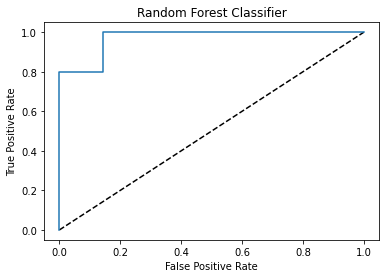

In [461]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Random Forest Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Classifier")
plt.show()

In [462]:
auc_score=roc_auc_score(y_test1,rf.predict(x_test1))
auc_score

0.8571428571428572

AUC_ROC score is almost equivalent to Accuracy score.

# Hyper Parameter Tuning

In [466]:
parameter={"criterion":['gini','entropy'],
          "max_depth":np.arange(2,20),
          "max_features":['auto','sqrt','log2'],
          "bootstrap":[True,False]}

In [467]:
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [465]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [468]:
gcv.fit(x_train1,y_train1)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [476]:
gcv.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto'}

With the Help of Grid Search CV looking out for best paramenters for the best model.

# Final Model

In [478]:
rf=RandomForestClassifier(bootstrap=True,criterion='gini',max_depth=2,max_features='auto')
rf.fit(x_train1,y_train1)
pred=rf.predict(x_test1)
print(accuracy_score(y_test1,pred))
print(classification_report(y_test1,pred))
print(confusion_matrix(y_test1,pred))

0.9166666666666666
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.83      1.00      0.91         5

    accuracy                           0.92        12
   macro avg       0.92      0.93      0.92        12
weighted avg       0.93      0.92      0.92        12

[[6 1]
 [0 5]]


# Saving the Model

In [479]:
import joblib
joblib.dump(rf,'baseball.pkl')

['baseball.pkl']